In [ ]:
import pandas as pd

In [ ]:
kidneydata = pd.read_csv('/content/kidney.csv')

In [ ]:
kidneydata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [ ]:
kidneydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
missing_ratio = kidneydata.isnull().mean()
print(missing_ratio)

HeartDisease        0.0
BMI                 0.0
Smoking             0.0
AlcoholDrinking     0.0
Stroke              0.0
PhysicalHealth      0.0
MentalHealth        0.0
DiffWalking         0.0
Sex                 0.0
AgeCategory         0.0
Race                0.0
Diabetic            0.0
PhysicalActivity    0.0
GenHealth           0.0
SleepTime           0.0
Asthma              0.0
KidneyDisease       0.0
SkinCancer          0.0
dtype: float64


This dataset has no missing values!

In [ ]:
col = list(kidneydata.columns.values)
for col in kidneydata:
    print(col, kidneydata[col].unique())

HeartDisease ['No' 'Yes']
BMI [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking ['Yes' 'No']
AlcoholDrinking ['No' 'Yes']
Stroke ['No' 'Yes']
PhysicalHealth [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking ['No' 'Yes']
Sex ['Female' 'Male']
AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity ['Yes' 'No']
GenHealth ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma ['Yes' 'No']
KidneyDisease ['No' 'Yes']
Skin

Exploratory Data Analysis: 

In [ ]:
cols = list(kidneydata.columns.values)
for cols in kidneydata:
    print(f"{cols} has {kidneydata[cols].nunique()} categories\n")

HeartDisease has 2 categories

BMI has 3604 categories

Smoking has 2 categories

AlcoholDrinking has 2 categories

Stroke has 2 categories

PhysicalHealth has 31 categories

MentalHealth has 31 categories

DiffWalking has 2 categories

Sex has 2 categories

AgeCategory has 13 categories

Race has 6 categories

Diabetic has 4 categories

PhysicalActivity has 2 categories

GenHealth has 5 categories

SleepTime has 24 categories

Asthma has 2 categories

KidneyDisease has 2 categories

SkinCancer has 2 categories



In [ ]:
kidneydata = kidneydata.rename(columns={'KidneyDisease': 'hasKD'})

kidneydata.head(2).T

,0,1
HeartDisease,No,No
BMI,16.6,20.34
Smoking,Yes,No
AlcoholDrinking,No,No
Stroke,No,Yes
PhysicalHealth,3.0,0.0
MentalHealth,30.0,0.0
DiffWalking,No,No
Sex,Female,Female
AgeCategory,55-59,80 or older


In [ ]:
kidneydata['Diabetic'] = kidneydata['Diabetic'].replace(
    {'No, borderline diabetes': 'No', 'Yes (during pregnancy)': 'Yes'})

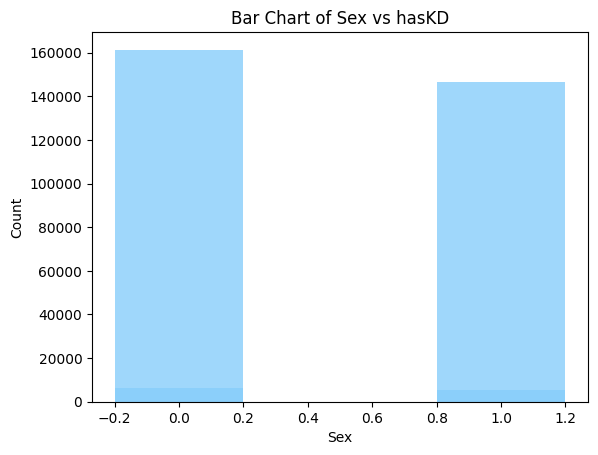

In [ ]:
import matplotlib.pyplot as plt

counts = kidneydata.groupby(['Sex', 'hasKD']).size().reset_index(name='count')

# Create a bar chart
fig, ax = plt.subplots()
ax.bar(x=counts['Sex'], height=counts['count'], width=0.4, 
       color=['#87CEFA'], alpha=0.8);
ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Bar Chart of Sex vs hasKD')
plt.show()

In [ ]:
binary_cols = ['HeartDisease','Stroke','Smoking','AlcoholDrinking', 
               'DiffWalking', 'Asthma' , 'hasKD', 'SkinCancer','Sex', 
               'PhysicalActivity','Diabetic']
for col in binary_cols:
    kidneydata[col] = kidneydata[col].replace({'No': 0, 'Yes': 1})
    kidneydata[col] = kidneydata[col].replace({'Female': 0, 'Male': 1})

In [ ]:
for col in binary_cols:
    kidneydata[col] = kidneydata[col].astype(int)

In [ ]:
kidneydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  hasKD             31

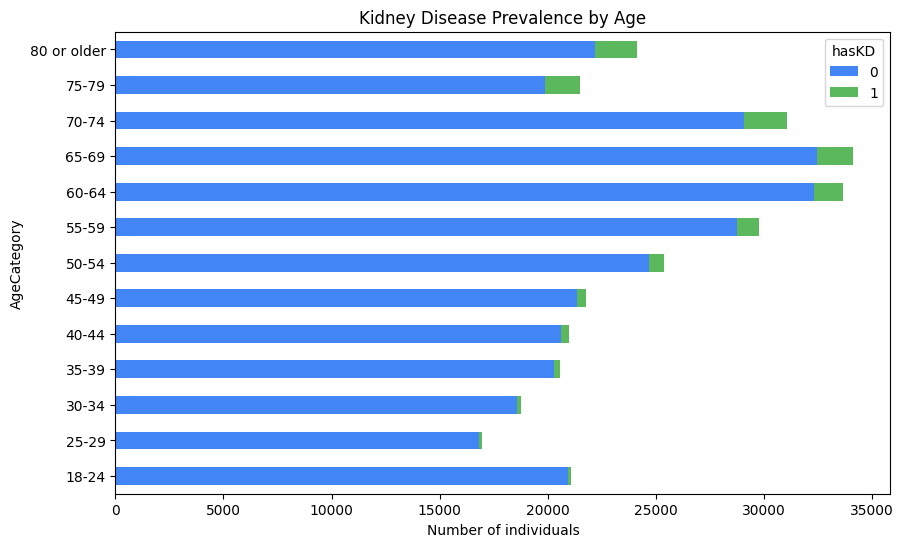

In [ ]:
#representation by agecategory
grouped = kidneydata.groupby(['AgeCategory', 'hasKD']).size().unstack()
ax = grouped.plot(kind='barh', stacked=True, 
                  color=["#4285f4", "#5cb85c"], 
                  figsize=(10,6))
plt.title('Kidney Disease Prevalence by Age')
plt.xlabel('Number of individuals')
plt.ylabel('AgeCategory')
plt.xticks(rotation=0)

plt.show()

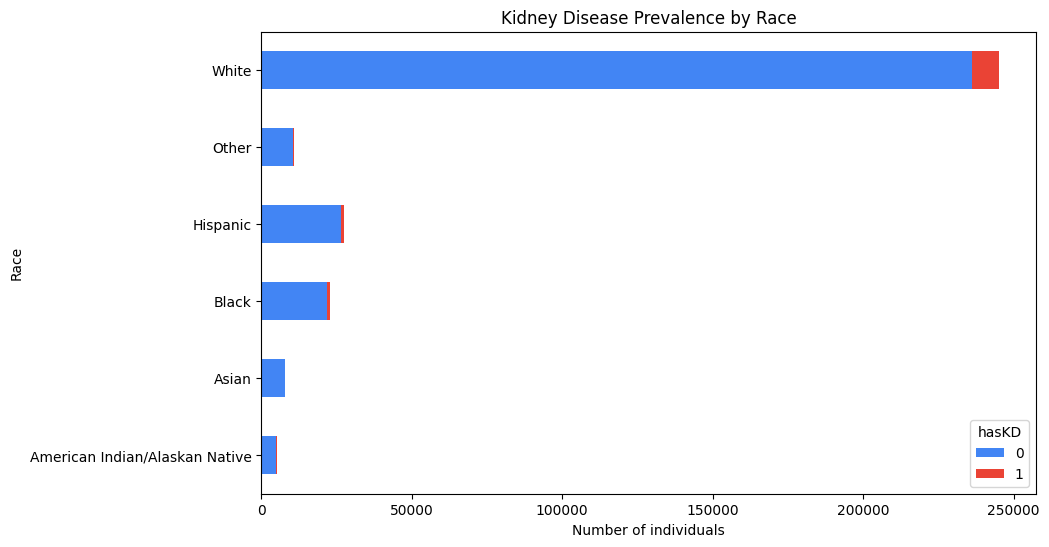

In [ ]:
grouped = kidneydata.groupby(['Race', 'hasKD']).size().unstack()
ax = grouped.plot(kind='barh', stacked=True, 
                  color=["#4285f4", "#ea4335"], 
                  figsize=(10,6))

plt.title('Kidney Disease Prevalence by Race')
plt.xlabel('Number of individuals')
plt.ylabel('Race')
plt.xticks(rotation=0)

plt.show()

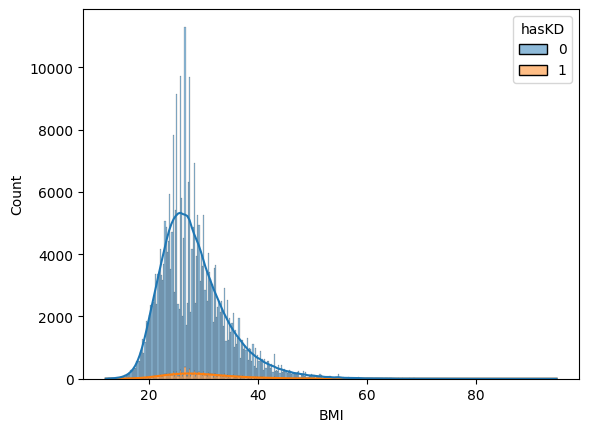

In [ ]:
import seaborn as sns
sns.histplot(data=kidneydata, x='BMI', hue='hasKD', multiple='stack', kde=True)
plt.show()

In [ ]:
col = list(kidneydata.columns.values)
for col in kidneydata:
    print(col, kidneydata[col].unique())

HeartDisease [0 1]
BMI [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking [1 0]
AlcoholDrinking [0 1]
Stroke [0 1]
PhysicalHealth [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking [0 1]
Sex [0 1]
AgeCategory ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic [1 0]
PhysicalActivity [1 0]
GenHealth ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma [1 0]
hasKD [0 1]
SkinCancer [1 0]


In [ ]:
kidneydata.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,PhysicalActivity,SleepTime,Asthma,hasKD,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,0.135590,0.775362,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,0.342353,0.417344,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,1.000000,1.000000,24.000000,1.000000,1.000000,1.000000


In [ ]:
kidneydata.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,hasKD,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0


In [ ]:
#dropping string columns 
kidneydata = kidneydata.drop(['GenHealth', 'Race', 'AgeCategory'], axis=1)

In [ ]:
cols = list(kidneydata.columns.values)
for cols in kidneydata:
    print(f"{cols} has {kidneydata[cols].nunique()} categories\n")

HeartDisease has 2 categories

BMI has 3604 categories

Smoking has 2 categories

AlcoholDrinking has 2 categories

Stroke has 2 categories

PhysicalHealth has 31 categories

MentalHealth has 31 categories

DiffWalking has 2 categories

Sex has 2 categories

Diabetic has 2 categories

PhysicalActivity has 2 categories

SleepTime has 24 categories

Asthma has 2 categories

hasKD has 2 categories

SkinCancer has 2 categories



# Correlation Analysis

<Axes: >

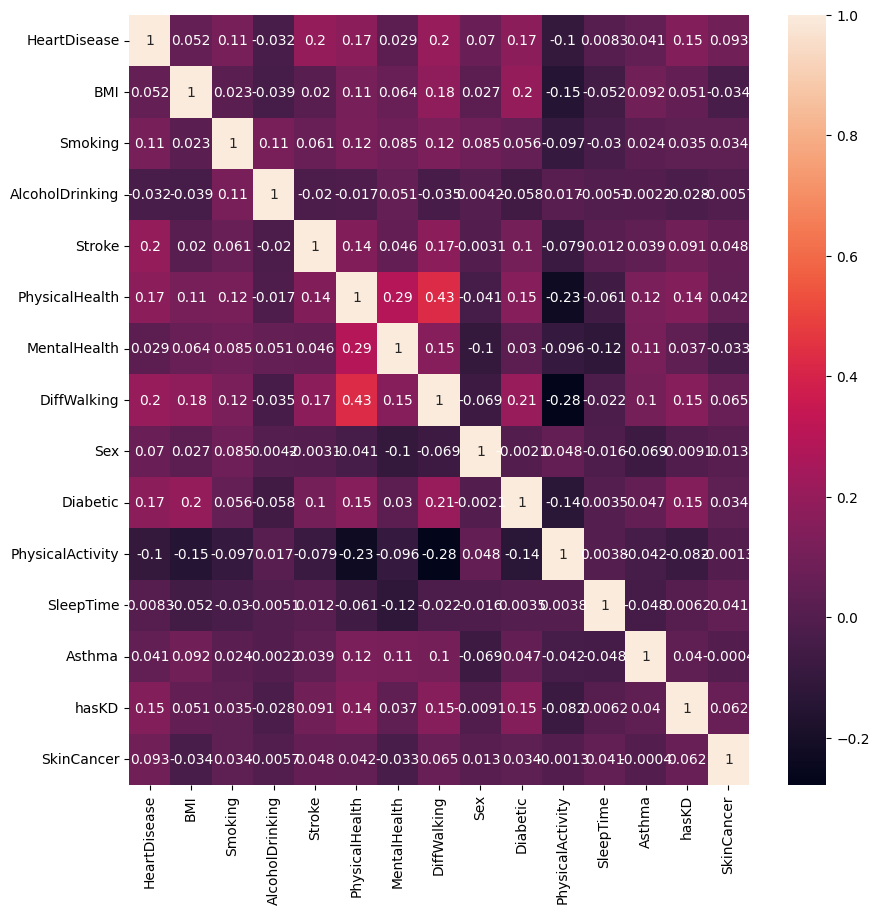

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(kidneydata.corr(),annot=True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#everything except the 'class' column is included in X
#y contains the target variable i.e. class
X = kidneydata.drop('hasKD', axis=1)
y = kidneydata['hasKD']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)


In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

importances = clf.feature_importances_

feat_imp_df = pd.DataFrame({'Feature': X_train.columns,
                            'Importance': importances})

feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

k = 15
selected_cols = feat_imp_df.iloc[:k]['Feature'].values
selected_df = kidneydata[selected_cols]

selected_df.head(2).T

,0,1
BMI,16.6,20.34
SleepTime,5.0,7.00
MentalHealth,30.0,0.00
PhysicalHealth,3.0,0.00
Smoking,1.0,0.00
Sex,0.0,0.00
Asthma,1.0,0.00
PhysicalActivity,1.0,1.00
DiffWalking,0.0,0.00
Diabetic,1.0,0.00


In [ ]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=15)

rfe.fit(X_train, y_train)
selected_cols1 = X_train.columns[rfe.support_]
selected_dfRFE = kidneydata[selected_cols1]

selected_dfRFE.head(2).T

,0,1
HeartDisease,0.0,0.00
BMI,16.6,20.34
Smoking,1.0,0.00
AlcoholDrinking,0.0,0.00
Stroke,0.0,1.00
PhysicalHealth,3.0,0.00
MentalHealth,30.0,0.00
DiffWalking,0.0,0.00
Sex,0.0,0.00
Diabetic,1.0,0.00


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
X_train, X_test, y_train, y_test = train_test_split(selected_df, y,
                                                    test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Without resampling the dataset
RF = RandomForestClassifier()

RF.fit(X_train, y_train)
y_pred1 = RF.predict(X_test)

print(classification_report(y_test, y_pred1))

accuracy_rf = accuracy_score(y_test, y_pred1)
print('Accuracy of Random Forest:', accuracy_rf)

accuracy_train_rf = accuracy_score(y_train, RF.predict(X_train))
print('Training Accuracy of Random Forest:', accuracy_train_rf)

cm_rf = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix for Random Forest:\n', cm_rf)


              precision    recall  f1-score   support

           0       0.96      0.99      0.98     61640
           1       0.13      0.03      0.04      2319

    accuracy                           0.96     63959
   macro avg       0.55      0.51      0.51     63959
weighted avg       0.93      0.96      0.94     63959

Accuracy of Random Forest: 0.9584733970199659
Training Accuracy of Random Forest: 0.9937303585109211
Confusion Matrix for Random Forest:
 [[61244   396]
 [ 2260    59]]


In [ ]:
#Without resampling the dataset
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


DT = DecisionTreeClassifier(random_state=42)
DT.fit(X_train, y_train)

dt_acc = accuracy_score(y_test, DT.predict(X_test))

print(f"Training Accuracy of Decision Tree is {accuracy_score(y_train, DT.predict(X_train))}")
print(f"Test Accuracy of Decision Tree is {dt_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, DT.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, DT.predict(X_test))}")

Training Accuracy of Decision Tree is 0.9940352413264748
Test Accuracy of Decision Tree is 0.9313466439437765 

Confusion Matrix :- 
[[59317  2279]
 [ 2112   251]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96     61596
           1       0.10      0.11      0.10      2363

    accuracy                           0.93     63959
   macro avg       0.53      0.53      0.53     63959
weighted avg       0.93      0.93      0.93     63959



In [ ]:
#Without resampling the dataset
from xgboost import XGBClassifier
XGB = XGBClassifier(random_state=42)
XGB.fit(X_train, y_train)

xgb_acc = accuracy_score(y_test, XGB.predict(X_test))

print(f"Training Accuracy of XGBoost is {accuracy_score(y_train, XGB.predict(X_train))}")
print(f"Test Accuracy of XGBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, XGB.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, XGB.predict(X_test))}")

Training Accuracy of XGBoost is 0.9639300176675683
Test Accuracy of XGBoost is 0.9631639018746384 

Confusion Matrix :- 
[[61587    28]
 [ 2328    16]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     61615
           1       0.36      0.01      0.01      2344

    accuracy                           0.96     63959
   macro avg       0.66      0.50      0.50     63959
weighted avg       0.94      0.96      0.95     63959



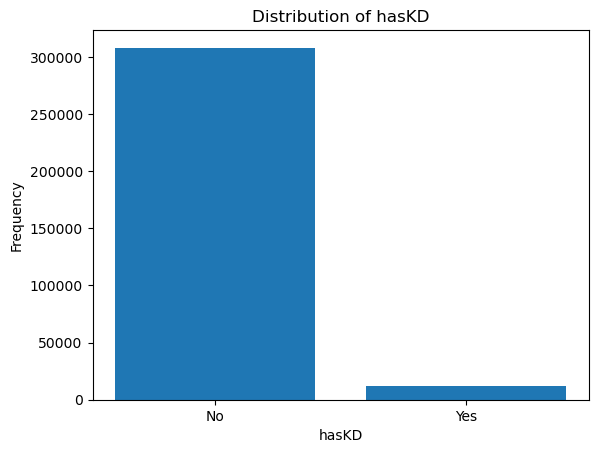

In [ ]:

counts = kidneydata['hasKD'].value_counts()
plt.bar(counts.index, counts.values)
plt.title('Distribution of hasKD')
plt.xlabel('hasKD')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [ ]:
from imblearn.over_sampling import SMOTE

# Define the SMOTE model
sm = SMOTE(random_state=42)

# Fit the SMOTE model to the training data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)


In [ ]:
#After Resampling
RF = RandomForestClassifier()

RF.fit(X_train_sm, y_train_sm)
y_pred_rfsm = RF.predict(X_test)

print(classification_report(y_test, y_pred_rfsm))

accuracy_smrf = accuracy_score(y_test, y_pred_rfsm)
print('Testing Accuracy of Random Forest:', accuracy_smrf)

accuracy_train_smrf = accuracy_score(y_train_sm, RF.predict(X_train_sm))
print('Training Accuracy of Random Forest:', accuracy_train_smrf)

cm_sm_rf = confusion_matrix(y_test, y_pred_rfsm)
print('Confusion Matrix for Random Forest:\n', cm_sm_rf)


              precision    recall  f1-score   support

           0       0.97      0.94      0.95     61615
           1       0.07      0.12      0.08      2344

    accuracy                           0.91     63959
   macro avg       0.52      0.53      0.52     63959
weighted avg       0.93      0.91      0.92     63959

Testing Accuracy of Random Forest: 0.9063149830360074
Training Accuracy of Random Forest: 0.9925243809887135
Confusion Matrix for Random Forest:
 [[61169   446]
 [ 2335     9]]


In [ ]:
#After Resampling 

DT = DecisionTreeClassifier()

DT.fit(X_train_sm, y_train_sm)
y_pred_dtsm = DT.predict(X_test)

print(classification_report(y_test, y_pred_dtsm))

accuracy_smdt = accuracy_score(y_test, y_pred_dtsm)
print('Testing Accuracy of Decision Tree:', accuracy_smdt)

accuracy_train_smdt = accuracy_score(y_train_sm, DT.predict(X_train_sm))
print('Training Accuracy of Decision Tree:', accuracy_train_smdt)

cm_smdt = confusion_matrix(y_test, y_pred_dtsm)
print('Confusion Matrix for Decision Tree:\n', cm_smdt)


              precision    recall  f1-score   support

           0       0.97      0.92      0.94     61615
           1       0.07      0.15      0.09      2344

    accuracy                           0.89     63959
   macro avg       0.52      0.54      0.52     63959
weighted avg       0.93      0.89      0.91     63959

Testing Accuracy of Decision Tree: 0.8917275129379759
Training Accuracy of Decision Tree: 0.9925690236646767
Confusion Matrix for Decision Tree:
 [[56682  4933]
 [ 1992   352]]


In [ ]:
XGB = XGBClassifier()

XGB.fit(X_train_sm, y_train_sm)
y_pred_xgbsm = XGB.predict(X_test)

print(classification_report(y_test, y_pred_xgbsm))

accuracy_smxgb = accuracy_score(y_test, y_pred_xgbsm)
print('Testing Accuracy of XGBoost:', accuracy_smxgb)

accuracy_train_smxgb = accuracy_score(y_train_sm, XGB.predict(X_train_sm))
print('Training Accuracy of XGBoost:', accuracy_train_smxgb)

cm_sm_xgb = confusion_matrix(y_test, y_pred_xgbsm)
print('Confusion Matrix for XGBoost:\n', cm_sm_xgb)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     61615
           1       0.09      0.24      0.14      2344

    accuracy                           0.89     63959
   macro avg       0.53      0.58      0.54     63959
weighted avg       0.94      0.89      0.91     63959

Testing Accuracy of XGBoost: 0.8878812989571444
Training Accuracy of XGBoost: 0.8565448192174545
Confusion Matrix for XGBoost:
 [[56225  5390]
 [ 1781   563]]
